# Лабораторная работа №1. ДВПФ и ДПФ  
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

# Модуль 3. Связь между ДПФ и ДВПФ.

Связь между ДВПФ и ДПФ для последовательностей конечной длительности и для периодических последовательностей. Частотная ось ДПФ (соответствие номеров отсчетов и частот).
Задача на определение эталонной частоты камертона по аудиозаписи (.wav) файл.
```scipy.io.wavfile (работа со звуковым wav файлом)```
Сравнение вычислительной эффективности БПФ. ```scipy.fft.next_fast_len```





In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import pandas as pd

In [38]:
# Если используете Jupyter, то можно поменять backend
# %matplotlib notebook
%matplotlib inline

## Связь ДВПФ и ДПФ для последовательностей конечной длительности

### Связь между ДПФ и ДВПФ в точках $\nu=n/N$.
Рассмотрим $N$-точечную последовательность $x[k]$. Ее ДВПФ
\begin{equation} 
X(\nu)= \sum_{k=0}^{N-1} x[k]       \exp\left(-j2\pi\nu k\right). 
\end{equation}

ДПФ для последовательности $ x[k]$, имеет следующий вид:
\begin{equation}
X[n]=\sum_{k=0}^{N-1} x[k] \exp\left(-j\left(\frac{2\pi}N\right)nk\right).
\end{equation}
Сравнивая формулы, в точках $\nu = n/N$ получаем равенство
\begin{equation} 
\boxed{X(n \Delta \nu)=X[n], \;  \; \Delta \nu=1/N.}
\end{equation}
Это означает, что коэффициенты ДПФ $X[n]$ равны отсчетам функции $X(\nu)$, взятым с шагом $\Delta \nu=1/N$.

### Интерполяция спектра добавлением нулевых отсчетов в сигнал (Zero Padding)

Улучшим качество визуализации ДВПФ при помощи отсчетов ДПФ. Получим M-точечную последовательность — добавим в исходную последовательность $x[k]$ $M-N$ отсчетов, равных нулю:
\begin{equation} 
y[k]=\left\{\begin{array}{l}x[k],\;0\leq k\leq N-1;\\0,\;\;N\leq k\leq M-1.\end{array}\right.
\end{equation}
Ее ДПФ $M$-точечное и определяется формулой
\begin{equation}
Y[n]=\sum_{k=0}^{M-1}y[k]\exp\left(-j\frac{2\pi}Mnk\right)=\sum_{k=0}^{N-1}x[k]\exp\left(-j\frac{2\pi}Mnk\right).
\end{equation}
При этом ДВПФ не изменяется:
\begin{equation}
Y(\nu)=\sum_{k=0}^{M-1}x[k]\exp(-j2\pi\nu k)=\sum_{k=0}^{N-1}x[k]\exp(-j2\pi\nu k).
\end{equation}
С помощью добавления нулевых отсчетов улучшено качество визуализации ДВПФ, поскольку число точек $\nu=n/N$ на одном периоде больше, чем в исходной последовательности. 

**Пример**.
Сигнал $x[k]=\sin(2\pi k \frac{2.6}{N})+\sin(2\pi k \frac{4.3}{N})+\sin(2\pi k \frac{6.6}{N})$ длительности $N=20$

In [39]:
N=20 # длина сигнала
k=np.arange(N) # индексы для последовательности x[k]
x=np.sin(2*np.pi*2.6*k/N)+np.sin(2*np.pi*4.3*k/N)+np.sin(2*np.pi*6.6*k/N) # последовательность x[k]

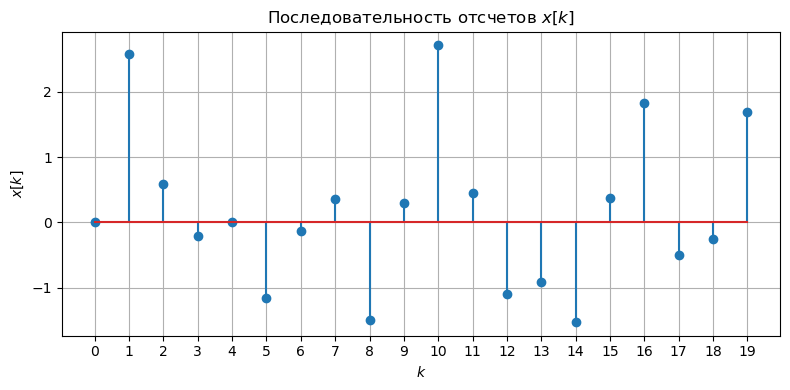

In [40]:
figure = plt.figure(figsize=[8, 4]) # полотно 8 х 6 дюймов
ax = plt.axes() # далее через ax будем обращаться к области текущего рисунка (axes)
ax.stem(k, x) # вывод отсчетов x[k] на график
ax.set_xlabel("$k$") # подпись горизонтальной оси, $ — для формул
ax.set_ylabel("$x[k]$") # подпись вертикальной оси 
ax.set_title("Последовательность отсчетов $x[k]$")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1)) # шаг шкалы по горизонтальной оси (base=1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax.grid() # сетка
figure.tight_layout() # выравнивание отступов вокруг графика (для заголовков, подписей осей)

In [41]:
Xn = np.fft.fft(x) # отсчеты ДПФ X[n]
n = np.arange(N) # индексы отсчетов X[n]
nu_Xn = n / N # нормированные частоты отсчетов n/N

In [42]:
df = pd.DataFrame(data={"X[n]": Xn}, index=n)
df

,X[n]
0,3.554338+0.000000j
1,4.011023+0.203656j
2,7.104681+1.048641j
3,-4.232877-3.275669j
4,6.387734-5.367572j
5,-2.133755+2.360613j
6,2.825597+2.194707j
7,-8.673915-1.951912j
8,-3.373050-0.371392j
9,-2.526127-0.123361j


In [43]:
dtft_size = 2048 # число точек ДВПФ на одном периоде
Xnu = np.fft.fft(x, dtft_size) #  отсчеты ДВПФ X(nu) в точках на полуинтервале [0, 1) с шагом 1/dtft_size
nu = np.arange(0, 1, 1/dtft_size) # номированные частоты этих отсчетов

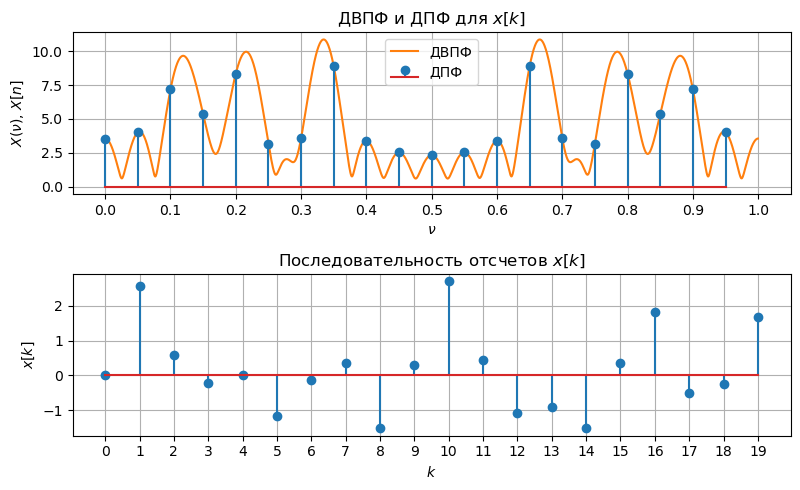

In [44]:
figure = plt.figure(figsize=[8, 5]) # полотно 8 х 6 дюймов
ax1 = plt.subplot(211) # разделим область на два графика (по вертикали)
                       # далее через ax1 будем обращаться к первому графику текущего рисунка 
ax1.plot(nu, abs(Xnu), 'C1', label="ДВПФ")
ax1.stem(nu_Xn, abs(Xn), label="ДПФ") # вывод отсчетов ДПФ на график
ax1.set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax1.set_ylabel("$X(\\nu)$, $X[n]$") # подпись вертикальной оси 
ax1.set_title("ДВПФ и ДПФ для $x[k]$")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1)) # шаг шкалы по горизонтальной оси (base=0.1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax1.grid() # сетка
ax1.legend()

ax2 = plt.subplot(212) # далее через ax2 будем обращаться к второму графику текущего рисунка 
ax2.stem(k, x) # вывод отсчетов x[k] на график
ax2.set_xlabel("$k$") # подпись горизонтальной оси, $ — для формул
ax2.set_ylabel("$x[k]$") # подпись вертикальной оси 
ax2.set_title("Последовательность отсчетов $x[k]$")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=1)) # шаг шкалы по горизонтальной оси (base=1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax2.grid() # сетка
figure.tight_layout() # выравнивание отступов вокруг графика (для заголовков, подписей осей)

Дополним последовательность нулевыми отсчетами.

In [45]:
N=20 # длина сигнала
k=np.arange(N) # индексы для последовательности x[k]
x=np.sin(2*np.pi*2.6*k/N)+np.sin(2*np.pi*4.3*k/N)+np.sin(2*np.pi*6.6*k/N) # последовательность x[k]

In [46]:
N=100
k=np.arange(N) # индексы для последовательности x[k]
x.resize(N)
x

array([ 0.        ,  2.58119207,  0.57947809, -0.21552154,  0.00898058,
       -1.16404349, -0.13903732,  0.36253893, -1.50411061,  0.29177747,
        2.71113003,  0.44692173, -1.09856811, -0.92148701, -1.52658364,
        0.36965435,  1.83216548, -0.4959214 , -0.25276525,  1.68853743,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

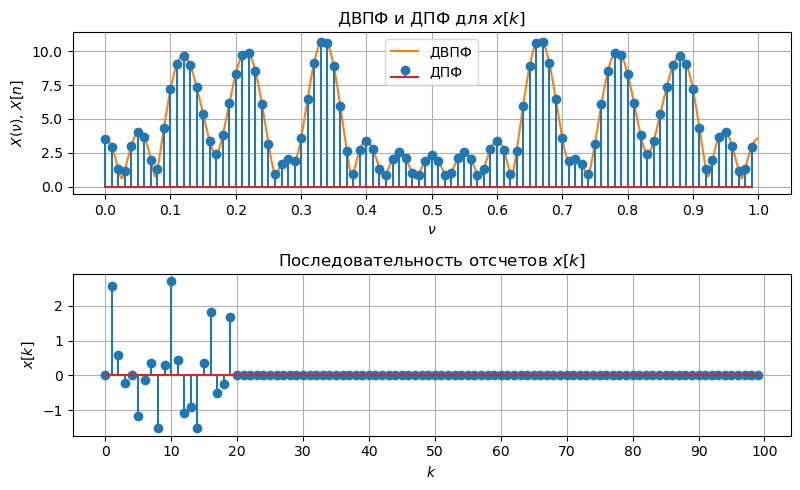

In [47]:
Xn = np.fft.fft(x) # отсчеты ДПФ X[n]
n = np.arange(N) # индексы отсчетов X[n]
nu_Xn = n / N # нормированные частоты отсчетов n/N

dtft_size = 2048 # число точек ДВПФ на одном периоде
Xnu = np.fft.fft(x, dtft_size) #  отсчеты ДВПФ X(nu) в точках на полуинтервале [0, 1) с шагом 1/dtft_size
nu = np.arange(0, 1, 1/dtft_size) # номированные частоты этих отсчетов

figure = plt.figure(figsize=[8, 5]) # полотно 8 х 6 дюймов
ax1 = plt.subplot(211) # далее через ax будем обращаться к области текущего рисунка (axes)
ax1.plot(nu, abs(Xnu), 'C1', label="ДВПФ")
ax1.stem(nu_Xn, abs(Xn), label="ДПФ") # вывод отсчетов ДПФ на график
ax1.set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax1.set_ylabel("$X(\\nu)$, $X[n]$") # подпись вертикальной оси 
ax1.set_title("ДВПФ и ДПФ для $x[k]$")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1)) # шаг шкалы по горизонтальной оси (base=0.1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax1.grid() # сетка
ax1.legend()

ax2 = plt.subplot(212) # далее через ax будем обращаться к области текущего рисунка (axes)
ax2.stem(k, x) # вывод отсчетов x[k] на график
ax2.set_xlabel("$k$") # подпись горизонтальной оси, $ — для формул
ax2.set_ylabel("$x[k]$") # подпись вертикальной оси 
ax2.set_title("Последовательность отсчетов $x[k]$")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=x.size//10)) # шаг шкалы по горизонтальной оси (base=1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax2.grid() # сетка
figure.tight_layout() # выравнивание отступов вокруг графика (для заголовков, подписей осей)

### Второй параметр функций np.fft.fft() и scipy.fft.fft()

Заметим, что дополнять последовательность нулевыми отсчетами перед использованием функций `np.fft.fft()` (либо `scipy.fft.fft()`) необязательно. Для увеличения размерности ДПФ можно использовать второй параметр этих функции. 

`np.fft.fft(x, M)`
* `x` — исходная последовательность, 
* `M` — параметр:
* * если `M > x.size`, то последовательность дополнятеся нулями до `M` отсчетов,
* * если `M == x.size`, то размерность ДПФ равна длине сигнала,
* * если `M < x.size`, то анализируемая последовательность сокращается до `M` отсчетов.

**1 способ (через второй параметр функции fft)**

In [48]:
N=20 # длина сигнала
k=np.arange(N) # индексы для последовательности x[k]
x=np.sin(2*np.pi*2.6*k/N)+np.sin(2*np.pi*4.3*k/N)+np.sin(2*np.pi*6.6*k/N) # последовательность x[k]
Xn1 = np.fft.fft(x, 100) # отсчеты 100-точечного ДПФ X[n] 

**2 способ (изменение длины массива, менее эффективный)**

In [49]:
N=100
k=np.arange(N) # индексы для последовательности x[k]
x.resize(N) # увеличение размерности массива дополненнием нулями
Xn2 = np.fft.fft(x) # отсчеты ДПФ X[n]

Сравним результаты поэлементно. 

In [50]:
np.isclose(Xn1, Xn2)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### fftshift()

Обратимся еще раз к предыдущей картинке, иллюстрирующией ДВПФ и ДПФ последовательности. Функция `fft()` считает отсчеты ДПФ c индексами $n=0,\;1,\; \dots,\;  N-1$, которым соответствуют нормированные частоты $\nu_n=n/N$:
$$\nu_n=0, \;\dfrac{1}{N}, \;\dfrac{2}{N},\; \dots,\;  \dfrac{N-1}{N},$$
которые лежат на полуинтервале $[0;\; 1).$

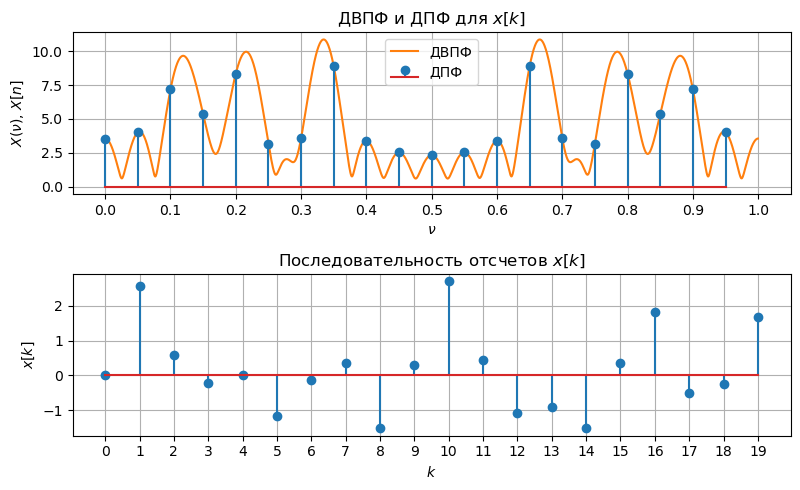

In [51]:
N=20 # длина сигнала
k=np.arange(N) # индексы для последовательности x[k]
x=np.sin(2*np.pi*2.6*k/N)+np.sin(2*np.pi*4.3*k/N)+np.sin(2*np.pi*6.6*k/N) # последовательность x[k]

Xn = np.fft.fft(x) # отсчеты ДПФ X[n]
n = np.arange(N) # индексы отсчетов X[n]
nu_Xn = n / N # нормированные частоты отсчетов n/N

dtft_size = 2048 # число точек ДВПФ на одном периоде
Xnu = np.fft.fft(x, dtft_size) #  отсчеты ДВПФ X(nu) в точках на полуинтервале [0, 1) с шагом 1/dtft_size
nu = np.arange(0, 1, 1/dtft_size) # номированные частоты этих отсчетов

figure = plt.figure(figsize=[8, 5]) # полотно 8 х 6 дюймов
ax1 = plt.subplot(211) # разделим область на два графика (по вертикали)
                       # далее через ax1 будем обращаться к первому графику текущего рисунка 
ax1.plot(nu, abs(Xnu), 'C1', label="ДВПФ")
ax1.stem(nu_Xn, abs(Xn), label="ДПФ") # вывод отсчетов ДПФ на график
ax1.set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax1.set_ylabel("$X(\\nu)$, $X[n]$") # подпись вертикальной оси 
ax1.set_title("ДВПФ и ДПФ для $x[k]$")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1)) # шаг шкалы по горизонтальной оси (base=0.1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax1.grid() # сетка
ax1.legend()

ax2 = plt.subplot(212) # далее через ax2 будем обращаться к второму графику текущего рисунка 
ax2.stem(k, x) # вывод отсчетов x[k] на график
ax2.set_xlabel("$k$") # подпись горизонтальной оси, $ — для формул
ax2.set_ylabel("$x[k]$") # подпись вертикальной оси 
ax2.set_title("Последовательность отсчетов $x[k]$")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=1)) # шаг шкалы по горизонтальной оси (base=1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax2.grid() # сетка
figure.tight_layout() # выравнивание отступов вокруг графика (для заголовков, подписей осей)

Функция `np.fft.fftshift()` позволяет сделать циклический сдвиг отсчетов так, чтобы они относились к нормированным частотам $\nu \in [0,5;\; 0,5).$

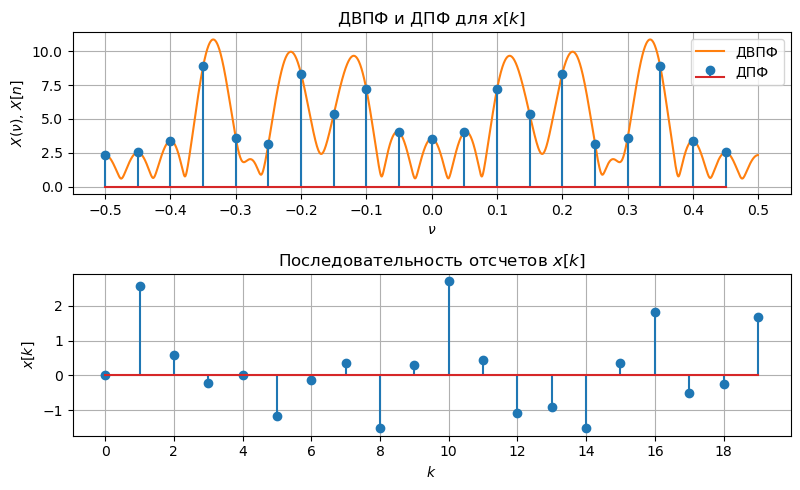

In [52]:
N=20 # длина сигнала
k=np.arange(N) # индексы для последовательности x[k]
x=np.sin(2*np.pi*2.6*k/N)+np.sin(2*np.pi*4.3*k/N)+np.sin(2*np.pi*6.6*k/N) # последовательность x[k]


Xn = np.fft.fftshift(np.fft.fft(x)) # отсчеты ДПФ X[n]
nu_Xn = np.arange(-0.5, 0.5, 1 / N)  # нормированные частоты отсчетов n/N

dtft_size = 2048 # число точек ДВПФ на одном периоде
Xnu = np.fft.fftshift(np.fft.fft(x, dtft_size)) #  отсчеты ДВПФ X(nu) в точках на полуинтервале [0, 1) с шагом 1/dtft_size
nu = np.arange(-0.5, 0.5, 1/dtft_size) # номированные частоты этих отсчетов

figure = plt.figure(figsize=[8, 5]) # полотно 8 х 6 дюймов
ax1 = plt.subplot(211) # далее через ax будем обращаться к области текущего рисунка (axes)
ax1.plot(nu, abs(Xnu), 'C1', label="ДВПФ")
ax1.stem(nu_Xn, abs(Xn), label="ДПФ") # вывод отсчетов ДПФ на график
ax1.set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax1.set_ylabel("$X(\\nu)$, $X[n]$") # подпись вертикальной оси 
ax1.set_title("ДВПФ и ДПФ для $x[k]$")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1)) # шаг шкалы по горизонтальной оси (base=0.1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax1.grid() # сетка
ax1.legend()

ax2 = plt.subplot(212) # далее через ax будем обращаться к области текущего рисунка (axes)
ax2.stem(k, x) # вывод отсчетов x[k] на график
ax2.set_xlabel("$k$") # подпись горизонтальной оси, $ — для формул
ax2.set_ylabel("$x[k]$") # подпись вертикальной оси 
ax2.set_title("Последовательность отсчетов $x[k]$")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=x.size//10)) # шаг шкалы по горизонтальной оси (base=1) 
                                                           # требует импорта 
                                                           # import matplotlib.ticker as ticker
ax2.grid() # сетка
figure.tight_layout() # выравнивание отступов вокруг графика (для заголовков, подписей осей)

### Сравнение вычислительной эффективности

Предположим, что нам нужно посчитать ДВПФ в 131072 точках для 512-точечной последовательности. Осуществим вычисления с использованием формулы ДВПФ и с помощью `fft(x, 32768)`. Сравним время работы программы в двух случаях.

Вычисление по алгоритму быстрого преобразования Фурье  (FFT)

In [59]:
import time
Q=2**17
print('Q =', Q)
N=2**9
k=np.arange(N)
x=np.sin(2*np.pi*k*0.2)

Q = 131072


``np.fft.fft``

In [60]:
start=time.time()
Xn1=np.fft.fft(x, Q)
finish=time.time()
print("Time ", finish-start, "c")

Time  0.007900476455688477 c


```scipy.fft.fft``` с распараллеливанием на 4 исполнителя

In [61]:
start=time.time()
Xn1=scipy.fft.fft(x, Q, workers=4)
finish=time.time()
print("Time ", finish-start, "c")

Time  0.0026400089263916016 c


Вычисление по формуле ДВПФ
\begin{equation} 
X(\nu)= \sum_{k=0}^{N-1} x[k]       \exp\left(-j2\pi\nu k\right). 
\end{equation}

In [62]:
u=np.arange(Q)/Q
Xn2=np.zeros(Q, dtype='complex')

start=time.time()
for u in range(Q):
    Xn2[u]= Xn2[u] + np.dot(np.exp(-1j*k*2*np.pi*u/Q), x) 
print("Time ", time.time()-start, "c")

Time  5.077971935272217 c


Вычислим максимальную разность результатов.

In [63]:
max(abs(Xn1-Xn2))

1.503744810138061e-11

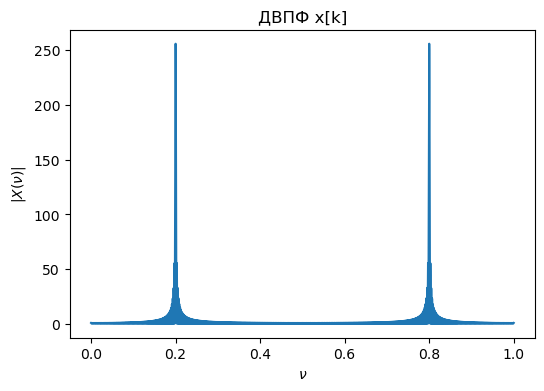

In [64]:
plt.figure(figsize=[6, 4], dpi=100)
plt.plot(np.arange(Q)/Q, abs(Xn1))
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.title('ДВПФ x[k]')
plt.show()

### Функция next_fast_len


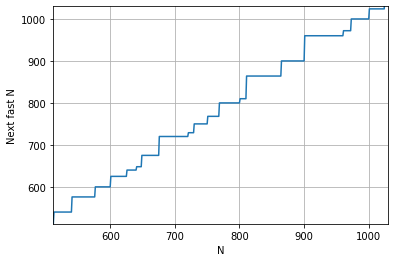

In [144]:
from scipy.fftpack import next_fast_len, fft
N=2**11
L=np.zeros(N)
for k in range(N):
    L[k]=next_fast_len(k)
plt.plot(L)
plt.xlim([512, 1030])
plt.ylim([512, 1030])
plt.xlabel("N")
plt.ylabel("Next fast N")
plt.grid()
plt.show()

In [145]:
next_fast_len(64001)

64800

In [146]:
N=64001
k=np.arange(N)
x=np.sin(2*np.pi*k*0.2)
start1=time.time()
Xn1=fft(x, 64828)
print(time.time()-start1, "c")

0.01599907875061035 c


In [147]:
start3=time.time()
Xn1=fft(x, 64800)
print(time.time()-start3, "c")

0.0039942264556884766 c


## Связь между ДПФ и ДВПФ для периодических последовательностей.

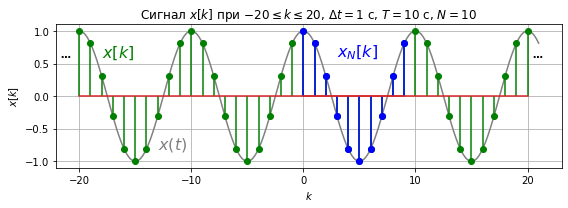

In [149]:
plt.figure(figsize=[8, 3])
nu0=0.1
N=41
k=np.arange(N)-20
x=np.cos(2*np.pi*k*nu0)

k1=np.arange(10)
x1=np.cos(2*np.pi*k1*nu0)

k2=np.arange(x.size*100)-2000
y=np.cos(2*np.pi*k2/100*nu0)
plt.plot(k2/100, y, 'grey')

plt.stem(k, x, 'g', 
         markerfmt='go', 
         use_line_collection=True)
plt.stem(k1, x1, 'b', 
         markerfmt='bo', 
         use_line_collection=True)


plt.axis(ymax=1.1*max(abs(x)))
plt.title(u'Сигнал $x[k]$ при $-20 \leq k \leq 20$, $\\Delta t=1$ c, $T=10$ c, $N=10$')
plt.xlabel(u'$k$')
plt.ylabel(u'$x[k]$')
plt.grid()
plt.annotate(u"$\mathbf{\dots}$", (20.4, 0.6))
plt.annotate(u"$\mathbf{\dots}$", (-21.7, 0.6))
plt.text(3, 0.6, u"$x_N[k]$", 
         {'color': 'b', 'fontsize': 16})
plt.text(-18, 0.6, u"$x[k]$", 
         {'color': 'g', 'fontsize': 16})
plt.text(-13, -0.8, u"$x(t)$", 
         {'color': 'grey', 'fontsize': 16})

plt.tight_layout()

plt.show()

Пусть аналоговый периодический сигнал $x(t)$ с периодом $T$ дискредитирован с шагом $\Delta t=T/N$. Тогда на одном периоде $x(t)$ будет содержаться $N$ отсчетов (если крайний правый отсчет попадает на границу периода, то будем считать его относящимся к следующему периоду). Далее примем при анализе последовательностей для краткости записи $\Delta t=1$. Выделим для последовательности отсчетов $x(k)$ один период
\begin{equation}
x_N[k]=\left\{\begin{array}{l}x[k],\;0\leq k\leq N-1;\\0,\;\{k<0\}\;\cup\;\{k\geq N\}.\end{array}\right.
\end{equation}

Пусть $x_N[k]\; \overset{\text{ДВПФ}}\longleftrightarrow  \; X_N(\nu)$.  Последовательность $x[k]$ может быть представлена в виде дискретной сверки $x_N[k]$ и $\sum_{m=-\infty}^\infty\mathbf1\left[k-mN\right].$ Причем
$$\sum_{m=-\infty}^\infty\mathbf1\left[k-mN\right] \overset{\text{ДВПФ}}\longleftrightarrow  \frac1N\sum_{n=-\infty}^\infty\delta\left(\nu-\frac{\displaystyle n}N\right).$$
  Тогда
\begin{equation}
X(\nu)=\frac{1}{N} X_N(\nu) \sum_{n=-\infty}^\infty  \delta\left(\nu - \frac{n}{N}\right).
\end{equation}
Последовательность $x_N[k]$ имеет конечную длительность, является абсолютно суммируемой. $X_N(\nu)$ непрерывна. При этом ДВПФ периодической последовательности $x[k]$ имеет дискретную структуру, которой в континуальной записи соответствует некоторый периодический набор $\delta$-функции. 


Введем периодическую функцию дискретного аргумента $\tilde{X}[n]$, значения которой будут соответствовать площадям дельта-функций в $X(\nu)$ в точках $\nu=n/N$. В таком случае 
\begin{equation}
\tilde{X}[n]=\frac{1}{N} X_N(\frac{n}{N}) = \frac{1}{N} \sum_{k=0}^{N-1} x[k] \exp(-j 2\pi\frac{ n}{N} k).
\end{equation} 
$$
x[k]=\int_{-1/2}^{1/2} X(\nu) \exp({j2\pi \nu k})d\nu=\int_{0}^{1} X(\nu) \exp({j2\pi \nu k})d\nu =$$ $$=\int_{0}^{1} X_N(\nu)\frac{1}{N} \sum_{n=-\infty}^\infty  \delta\left(\nu - \frac{n}{N}\right) \exp({j2\pi \nu k})d\nu= \frac{1}{N} \sum_{n=0}^{N-1} X_N(\frac{n}{N}) \exp(j2\pi\frac{n}{N} k)$$
\begin{equation}
x[k]=\sum_{n=0}^{N-1} \tilde{X}[n]\exp(j2\pi\frac{n}{N} k)
\end{equation} 
Получаем следующую пару формул
\begin{equation}
\boxed{
\tilde{X}[n]= \frac{1}{N} \sum_{k=0}^{N-1} x[k] \exp(-j 2\pi\frac{ n}{N} k),
\\
x[k]=\sum_{n=0}^{N-1} \tilde{X}[n]\exp(j2\pi\frac{n}{N} k),
}
\end{equation} 
определяющие прямое обратное **дискретное преобразование Фурье (ДПФ)**. В ДПФ и частотная ($n$), и временная ($k$) переменная дискретна, функция $\tilde{X}[n]$ периодична с периодом $N$, а в качестве главного периода для отсчетов ДПФ выбирают такой, на котором $n=0, \dots, N-1$.

### Пример

Предположим, что имеется периодическая последовательность ($\infty<k<+\infty$)
$$x[k]=\cos(2\pi \frac{3}{16} k).$$ 

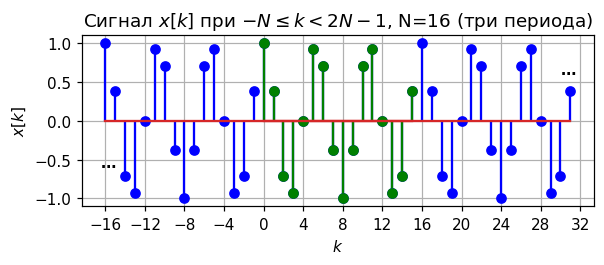

In [ ]:
#@title > Code  | Сигнал
N=16
nu0=3/16
k=np.arange(N)
x=np.cos(2*np.pi*nu0*k)


kp=np.hstack((k-N, k, k+N))
xp=np.hstack((x, x, x))

plt.figure(figsize=[6, 7], dpi=110)
plt.subplot(3, 1, 1)
plt.stem(kp, xp, 'b', 'bo', use_line_collection=True)
plt.stem(k, x, 'g', 'go', use_line_collection=True)
plt.axis(ymax=1.1*max(abs(x)))
plt.title(u'Сигнал $x[k]$ при $-N\leq k<2N-1$, N=%i (три периода)' %N)
plt.xticks(np.arange(-N, 2*N+1, N//4))
plt.yticks([-1, -0.5, 0, 0.5,1])
plt.xlabel(u'$k$')
plt.ylabel(u'$x[k]$')
plt.grid()
plt.annotate(u"$\mathbf{\dots}$", (-16.5, -0.6))
plt.annotate(u"$\mathbf{\dots}$", (30, 0.6))
plt.show()


Учитывая, что $\cos(2\pi \frac{3}{16} k)=\frac{1}{2} \exp(j2\pi \frac{3}{16} k) +\frac{1}{2} \exp(-j2\pi \frac{3}{16} k)$, получаем для ДВПФ этой последовательности 
$$X(\nu)=\sum_{n=-\infty}^{\infty} \dfrac{1}{2}  \delta(\nu - \dfrac{3}{16}-n)+\dfrac{1}{2}  \delta(\nu + \dfrac{3}{16}-n).$$

$X(\nu)$ содержит две $\delta$-функции с площадями $1/2$ на каждом периоде. Рассмотрим период $0 \leq \nu < 1$ (правую крайнюю точку можем не включать из-за периодичности $X(\nu)$). На нем содержится две $\delta$-функции в точках $\nu_1=\frac{3}{16}$ и $\nu_2=\frac{13}{16}$. Последовательность имеет период $N=16$ точек. Это означает, что можно установить значения 16-точечного ДПФ $\tilde{X}[n]$. $\tilde{X}[3]=1/2$, $\tilde{X}[13]=1/2$, а в остальных точках главного периода $\tilde{X}[n]=0$.

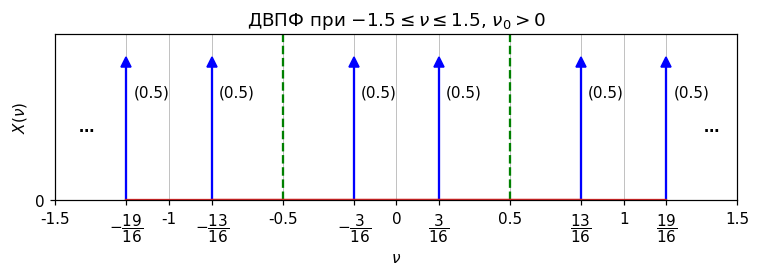

In [ ]:
#@title > Figure | ДВПФ


plt.figure(figsize=[8, 2], dpi=110)
plt.stem(np.arange(-1,2)+3/16, [1, 1, 1], 'b', 
         markerfmt="b^", use_line_collection=True)
plt.stem(np.arange(-1,2)-3/16, [1, 1, 1], 'b', 
         markerfmt="b^", use_line_collection=True)
for s in range(-1, 2):
  plt.annotate(u"(0.5)", (s+3.5/16, 0.75))
  plt.annotate(u"(0.5)", (s-2.5/16, 0.75))


plt.annotate(u"$\mathbf{\dots}$", (-1.4, 0.5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 0.5))
plt.title(u'ДВПФ при $-1.5 \leq \\nu \leq 1.5$, $\\nu_0>0$')
plt.ylabel('$X(\\nu)$')
plt.xlabel('$\\nu$')
plt.yticks([0])
W=3
plt.xticks([-1.5, -19/16, -1, -13/16, -0.5,-3/16, 
            0, 3/16, 0.5, 13/16, 1, 19/16, 1.5],
           (-1.5, u"$-\\dfrac{19}{16}$", -1, u"$-\\dfrac{13}{16}$", 
            -0.5, u"$-\\dfrac{3}{16}$", 0,
            u"$\\dfrac{3}{16}$", 0.5, 
            u"$\\dfrac{13}{16}$", 1, 
            u"$\\dfrac{19}{16}$", 1.5))

plt.grid(linewidth=0.5)
plt.axis(ymin=0, ymax=1.2, xmin=-1.5, xmax=1.5)
plt.vlines([-0.5, 0.5], 0, 1.2, 'g', 'dashed')
plt.show()

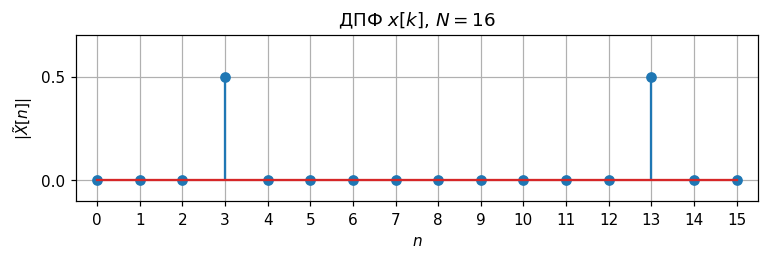

In [ ]:
#@title > Code  | 
plt.figure(figsize=[8, 2], dpi=110)
plt.stem(np.arange(N), abs(np.fft.fft(x)/N), use_line_collection=True)
plt.axis(xmin=-0.5, xmax=15.5, ymin=-0.1, ymax=0.7)
plt.xticks(np.arange(0, N, 1))
plt.yticks([0, 0.5])
plt.title(u'ДПФ $x[k]$, $N=$%i' %N)
plt.xlabel(u'$n$')
plt.ylabel(u'$|\\tilde{X}[n]|$')
plt.grid()


Тот же результат можно получить путем непосредственного вычисления ДПФ. 
$$\tilde{X}[n]= \frac{1}{N} \sum_{k=0}^{N-1} \cos(2\pi \frac{3}{16}k) \exp(-j 2\pi\frac{ n}{N} k)=$$$$= \frac{1}{16} \sum_{k=0}^{15} \frac{1}{2}  \exp\left(j 2\pi k (\frac{3}{16}-\frac{ n}{16})\right)+ \frac{1}{2}  \exp\left(-j 2\pi k (\frac{3}{16}+\frac{ n}{16})\right).$$

Рассмотрим отдельно сумму вида $\sum_{k=0}^{15} \exp\left(j 2\pi k \frac{m}{16}\right)$ при условии, что $m$ -- целое число, не равное нулю и не кратное $16$. В таком случае по формуле суммы геометрической прогрессии
$$\sum_{k=0}^{15} \exp\left(j 2\pi k \frac{m}{16}\right)=\dfrac{1-\exp(j2\pi m)}{1-\exp(j2\pi m\frac{1}{16})}=0.$$
В случае, когда $m$ либо равно нулю, либо кратно $16$, будет выполняться $\sum_{k=0}^{15} \exp\left(j 2\pi k \frac{m}{16}\right)=16$. В итоге на главном периоде есть только два ненулевых отсчета ДПФ —  $\tilde{X}[3]=1/2$ и $\tilde{X}[13]=1/2$. 

## Анализ аудиофайла 

### Камертон

In [83]:
import scipy.io.wavfile
from IPython.display import Audio
Audio('./tuning-fork.wav')

In [84]:
fs, x1=scipy.io.wavfile.read('./tuning-fork.wav')

Частота дискретизации в Гц.

In [85]:
fs

44100

Последовательность отсчетов

In [86]:
x1

array([ 0,  0, -1, ..., -3,  2, -1], dtype=int16)

Длина записи (число отсчетов)

In [87]:
x1.size

135680

Длина записи в секундах

In [88]:
x1.size/fs

3.076643990929705

In [89]:
10000/fs

0.22675736961451248

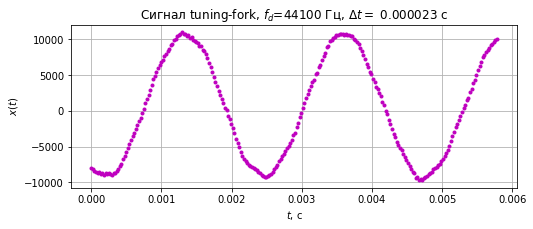

In [90]:
fs, x1=scipy.io.wavfile.read('./tuning-fork.wav')
time_duration=256
time_delay=10000
x=x1[time_delay:(time_delay+time_duration)]
plt.figure(figsize=[8, 3])
plt.plot(np.arange(x.size)/fs, x, 'm.')
#plt.stem(np.arange(x.size)/fs, x, 'g', 'g.', use_line_collection=True)
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал tuning-fork, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()

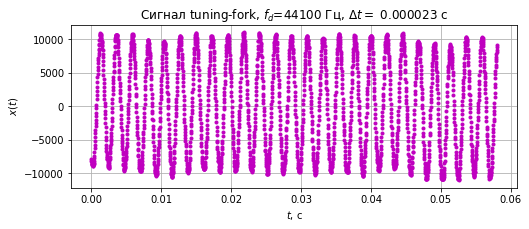

In [91]:
fs, x1=scipy.io.wavfile.read('./tuning-fork.wav')
time_duration=2560
time_delay=10000
x=x1[time_delay:(time_delay+time_duration)]
plt.figure(figsize=[8, 3])
plt.plot(np.arange(x.size)/fs, x, 'm.')
#plt.stem(np.arange(x.size)/fs, x, 'g', 'g.', use_line_collection=True)
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал tuning-fork, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()

ДПФ для последовавтельности отсчетов (определяем спектралный состав звукового файла)

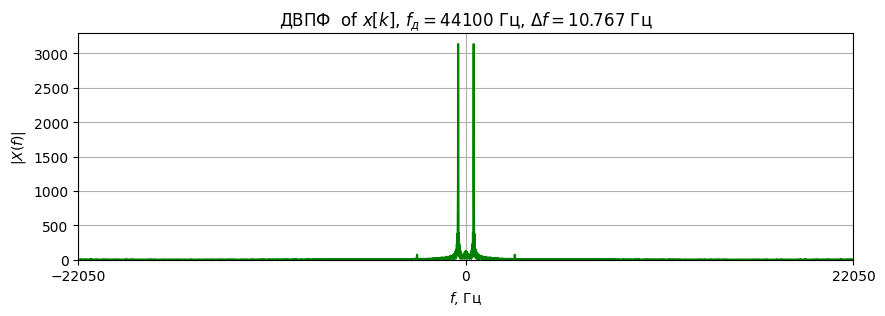

In [92]:
plt.figure(figsize=[10, 3], dpi=100)
M=4096
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 
plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
plt.xticks([-fs/2, 0, fs/2])

plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

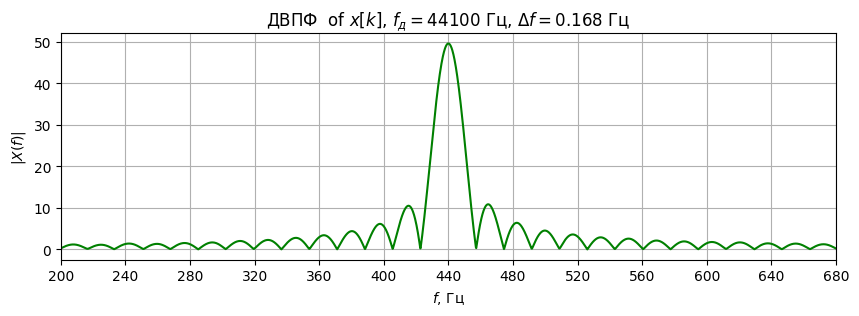

In [93]:
plt.figure(figsize=[10, 3], dpi=100)
M=4096*8*8
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 


#plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
#plt.xticks([-fs/2, 0, fs/2])

plt.xlim([200, 680])
plt.xticks(np.arange(200, 681, 40))


plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

### Флейта

In [94]:
import scipy.io.wavfile
from IPython.display import Audio
Audio('./flute32.wav')

In [95]:
fs, x1=scipy.io.wavfile.read('./flute32.wav')

Частота дискретизации $f_д$

In [96]:
fs

48000

Масссив отсчетов

In [97]:
x1

array([-281088, -316928, -335616, ...,  408576,  431360,  430336])

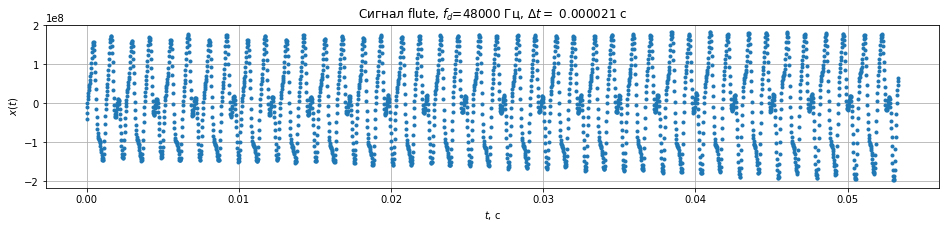

In [160]:
time_duration=2560
time_delay=110400
x=x1[time_delay:(time_delay+time_duration)]
plt.figure(figsize=[16, 3])
plt.plot(np.arange(x.size)/fs, x, '.')
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал flute, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()

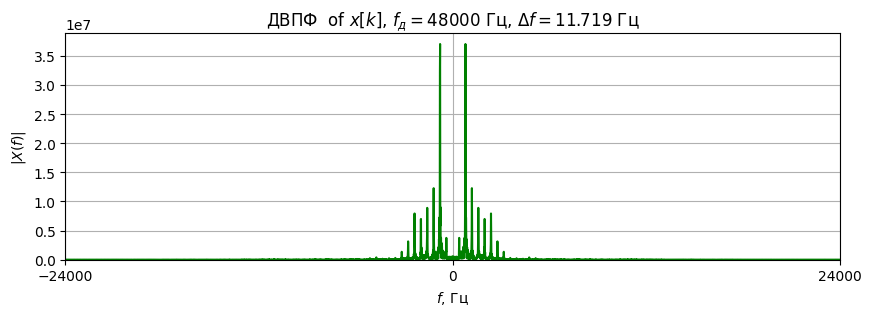

In [161]:
plt.figure(figsize=[10, 3], dpi=100)
M=4096
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 
plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
plt.xticks([-fs/2, 0, fs/2])

plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

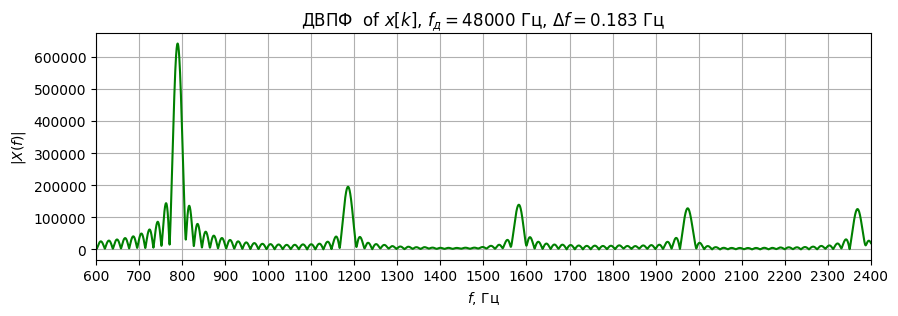

In [162]:
plt.figure(figsize=[10, 3], dpi=100)
M=4096*8*8
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 


#plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
#plt.xticks([-fs/2, 0, fs/2])


plt.xticks(np.arange(200, 2500, 100))
plt.xlim([600, 2400])


plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

### "Hanning a signal"

Умножим сигнал на окно Ханна соответсвующей длины.

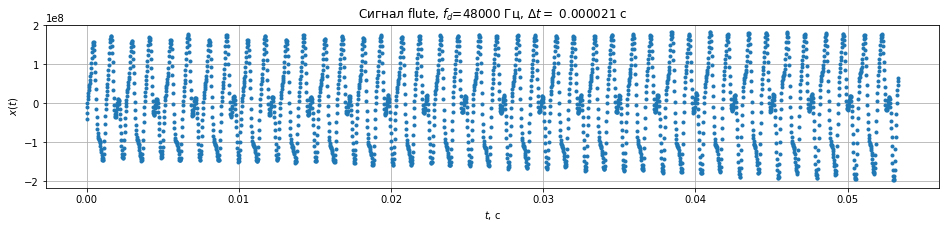

In [163]:
fs, x1=scipy.io.wavfile.read('./flute32.wav')
time_duration=2560
time_delay=110400
x=x1[time_delay:(time_delay+time_duration)]
plt.figure(figsize=[16, 3])
plt.plot(np.arange(x.size)/fs, x, '.')
#plt.stem(np.arange(x.size)/fs, x, 'g', 'g.', use_line_collection=True)
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал flute, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()

In [164]:
from scipy import signal
x=x*signal.hann(x.size)

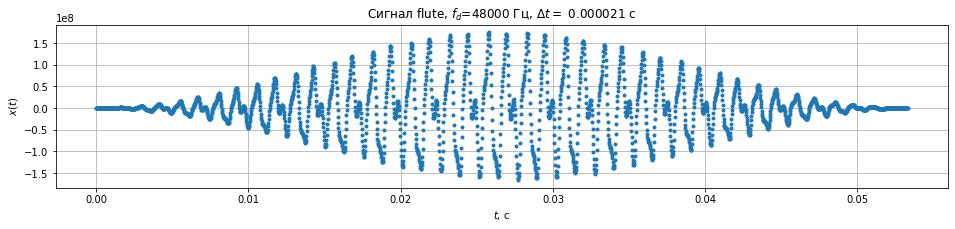

In [165]:
plt.figure(figsize=[16, 3])
plt.plot(np.arange(x.size)/fs, x, '.')
#plt.stem(np.arange(x.size)/fs, x, 'g', 'g.', use_line_collection=True)
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал flute, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()

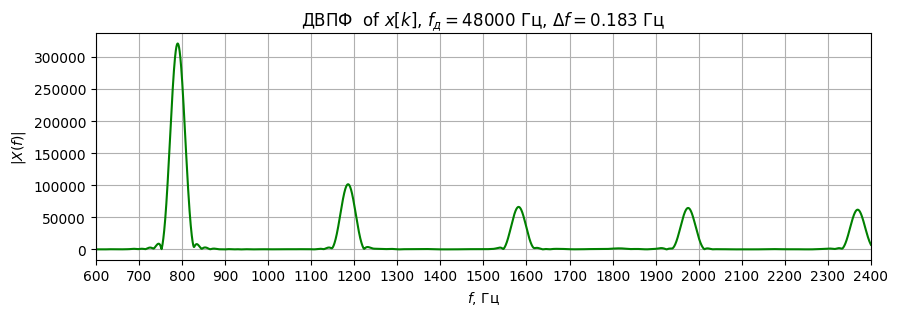

In [166]:
plt.figure(figsize=[10, 3], dpi=100)
M=4096*8*8
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 


#plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
#plt.xticks([-fs/2, 0, fs/2])


plt.xticks(np.arange(200, 2500, 100))
plt.xlim([600, 2400])


plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

## Примечание. 
Информацию о других видах окон можно найти на странице
https://docs.scipy.org/doc/scipy/reference/signal.windows.html

Более подробно вопрос о влиянии оконных функций будет рассмотрен в весеннем семестре. 